In [1]:
import pandas as pd
import numpy as np

# Обработка данных

## Загрузка данных

In [2]:
train_df = pd.read_csv('data/train.csv', delimiter=',')
cntrbtrs = pd.read_csv('data/cntrbtrs.csv', delimiter=';')
# trnsctns = pd.read_csv('data/trnsctns.csv', delimiter=';')

In [3]:
from IPython.display import display

display(train_df.head(7).T)
# display(trnsctns.head(7))
display(cntrbtrs.head(7))

,0,1,2,3,4,5,6
slctn_nmbr,1,0,2,0,0,1,0
client_id,0xA095932790098744A2325A8D152C05C7,0xF75BAA20A603A2479005DEB80464336E,0x0D18081E0556AF4F95A931FBA4159D52,0x0AD72BC5475D9A4D83E12350A84F839D,0x73DF06339CC25840838408BAD52BE223,0x092BC8229C2770459A87E35C754892E0,0x4768BFF110D93941963C2379F667A77E
npo_account_id,0xD4DBBAC6561929409BA45725A220613E,0x3DCFF11974B3D8458CE3569DE9E855D5,0x9DADF88CB3407C4E89403315F640393E,0xF59C4E62F115684899EAE9B5D5ECF70F,0x35BFFA05321C014B9FC29A189E89EDF0,0x55B01C14C2640948A54F2F3A0FB715A1,0x36C2EC983556E443817033C4032D7BA8
npo_accnts_nmbr,1,2,1,1,2,1,1
pmnts_type,2,2,1,1,2,2,2
year,2017,2009,2010,2005,2007,2007,2004
quarter,2017Q4,2009Q1,2010Q1,2005Q4,2007Q4,2007Q3,2004Q4
gender,1,1,1,-1,1,-1,-1
age,48,35,47,42,42,50,29
clnt_cprtn_time_d,8091,3303,1163,47,876,3536,2031


,slctn_nmbr,npo_accnt_id,accnt_pnsn_schm
0,2,0x66FC8B311E1E204187F41966B73E313F,0.0
1,2,0x675F74AFB447EF40AF1E4C042CCA440C,0.0
2,2,0x6FFA52921209184BA47B1E919B713894,0.0
3,2,0xB51B4374207FE0458B29FD1F9CBF69EB,1.0
4,2,0x7AC3935CC4DADE419F8378B9C276DEF7,2.0
5,2,0xE1E067B53D11184CA8A5268A04E26128,3.0
6,2,0xB71656505FEF9E4FAF0270CF8DFB1AAB,0.0


## Просмотр данных

In [4]:
display(train_df.info())
# display(trnsctns.info())
display(cntrbtrs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3589918 entries, 0 to 3589917
Data columns (total 42 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   slctn_nmbr              int64  
 1   client_id               object 
 2   npo_account_id          object 
 3   npo_accnts_nmbr         int64  
 4   pmnts_type              int64  
 5   year                    int64  
 6   quarter                 object 
 7   gender                  int64  
 8   age                     int64  
 9   clnt_cprtn_time_d       int64  
 10  actv_prd_d              int64  
 11  lst_pmnt_rcnc_d         int64  
 12  balance                 float64
 13  oprtn_sum_per_qrtr      float64
 14  oprtn_sum_per_year      float64
 15  frst_pmnt_date          object 
 16  lst_pmnt_date_per_qrtr  object 
 17  frst_pmnt               float64
 18  lst_pmnt                float64
 19  pmnts_sum               float64
 20  pmnts_nmbr              int64  
 21  pmnts_sum_per_qrtr      float64

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911470 entries, 0 to 911469
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   slctn_nmbr       911470 non-null  int64  
 1   npo_accnt_id     911470 non-null  object 
 2   accnt_pnsn_schm  911172 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.9+ MB


None

## Обработка пропущенных данных

### Контрибуьютеры

In [5]:
cntrbtrs.loc[~cntrbtrs['accnt_pnsn_schm'].notna()]

,slctn_nmbr,npo_accnt_id,accnt_pnsn_schm
48137,2,0x80D2005056AB16F911E6B94244A21118,NaN
98139,2,0x80D2005056AB16F911E6B9427B09F913,NaN
101968,2,0x80D2005056AB16F911E6B94CD47B13FA,NaN
105385,2,0x50F03AE3BFCC3E429C71EAD8F872EE0C,NaN
106835,2,0x80D2005056AB16F911E6B94D433AC86D,NaN
...,...,...,...
284667,1,0x521B2264D5D1A34C8237B62B6BCD73C1,NaN
285010,1,0x172D33AE68EA8541B3AF1A2CEEBCC2BD,NaN
285034,1,0x97C4B5F299C4DA4CBB2CDC67BCCDEB82,NaN
285086,1,0x8C3459F0572FB04AA874473FC85E53BC,NaN


In [6]:
cntrbtrs.fillna(cntrbtrs['accnt_pnsn_schm'].median(), inplace=True)

In [7]:
cntrbtrs.loc[~cntrbtrs['accnt_pnsn_schm'].notna()]

,slctn_nmbr,npo_accnt_id,accnt_pnsn_schm


In [8]:
cntrbtrs['accnt_pnsn_schm'] = cntrbtrs['accnt_pnsn_schm'].astype(int)

### Train.csv

Пустые столбцы:
- frst_pmnt_date
- lst_pmnt_date_per_qrtr
- postal_code
- region

Удалим строки где нет frst_pmnt_date и lst_pmnt_date_per_qrtr

In [9]:
inds = train_df.loc[train_df['frst_pmnt_date'].isnull() & train_df['lst_pmnt_date_per_qrtr'].isnull()].index
train_df = train_df.drop(index=inds)

Все строки без первой датой взноса удалились

In [10]:
train_df.loc[train_df['actv_prd_d'] == 0 & train_df['lst_pmnt_date_per_qrtr'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
0,1,0xA095932790098744A2325A8D152C05C7,0xD4DBBAC6561929409BA45725A220613E,1,2,2017,2017Q4,1,48,8091,...,-1,-1,-1,446254.0,САМАРСКАЯ ОБЛ,-1,-1,0,0,0
3,0,0x0AD72BC5475D9A4D83E12350A84F839D,0xF59C4E62F115684899EAE9B5D5ECF70F,1,1,2005,2005Q4,-1,42,47,...,-1,-1,-1,620034.0,СВЕРДЛОВСКАЯ ОБЛ,1,1,0,1,0
5,1,0x092BC8229C2770459A87E35C754892E0,0x55B01C14C2640948A54F2F3A0FB715A1,1,2,2007,2007Q3,-1,50,3536,...,-1,-1,-1,603093.0,НИЖЕГОРОДСКАЯ ОБЛ,1,-1,0,0,0
6,0,0x4768BFF110D93941963C2379F667A77E,0x36C2EC983556E443817033C4032D7BA8,1,2,2004,2004Q4,-1,29,2031,...,-1,-1,-1,398041.0,ЛИПЕЦКАЯ ОБЛ,1,1,0,0,0
14,2,0x2476F0F102543147B000A73BA0A4D11B,0x4EA96F95093551428215F7AB1A155D26,1,2,2012,2012Q4,-1,27,3112,...,-1,-1,-1,162604.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589885,0,0xE8C862710ECC3E498A37911BC3AF6C48,0x5C2BE1FA8C4CB746BB538F670A2524D2,1,3,2021,2021Q4,-1,52,857,...,-1,-1,-1,410003.0,САРАТОВСКАЯ ОБЛ,1,1,0,0,0
3589894,2,0x3C053384CDC0AD4692E18DC97E8034F3,0xE52E059F46CEC34DBB71DD2A3D6322D1,1,2,2014,2014Q4,-1,40,4966,...,-1,-1,-1,162600.0,ВОЛОГОДСКАЯ ОБЛ,1,-1,0,0,0
3589910,2,0x36D7873374F8EF4B9992E46AD2CA438C,0x06B8AE5D9CDB8149B90237DDA02672B4,1,2,2007,2007Q4,1,31,1616,...,-1,-1,-1,162612.0,ВОЛОГОДСКАЯ ОБЛ,1,1,0,0,0
3589916,1,0xF7C3ABC2295CC140A3B7EA53CB9B39DF,0xBB31CAEA5AF97C418942F2B68341D992,1,2,1999,1999Q1,-1,41,611,...,-1,-1,-1,249130.0,КАЛУЖСКАЯ ОБЛ,-1,-1,0,0,0


Заполним нулевые значения actv_prd_d медианым значением и рассчитаем неизвестные lst_pmnt_date_per_qrtr

In [11]:
train_df['actv_prd_d'].replace(0, train_df['actv_prd_d'].median(), inplace=True)
train_df.loc[train_df['actv_prd_d'] == 0 & train_df['lst_pmnt_date_per_qrtr'].isnull()]

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_28752/544055115.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['actv_prd_d'].replace(0, train_df['actv_prd_d'].median(), inplace=True)


,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn


In [12]:
train_df['lst_pmnt_date_per_qrtr'] = (pd.to_datetime(train_df['frst_pmnt_date']) +
                                                  train_df['actv_prd_d'].astype('timedelta64[D]'))

Удалим все строчки где нет региона и почтового индекса

In [13]:
train_df.loc[train_df['region'].isnull() & train_df['postal_code'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
179,0,0xCDC5031E97872845A7B84E4A672CB6D7,0x844F25196F78134B9B32E06D6C377E87,1,1,2010,2010Q3,1,58,3734,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
301,0,0x4CCF461FFCED7948BCFCA3D0E6631F4B,0x105D7DF015BFE540B0B044BA1C25A0C2,1,2,2006,2006Q3,1,55,2669,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
349,0,0x3BD5BA047DC4F94E95B926564D190955,0xA343B4FD6667E546BF177B4D8B467994,1,2,2005,2005Q1,1,27,1940,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
356,0,0x18A67B35EA569842A696521BBBEA7CFB,0x6815EF1CAB03E44DB6A7ECD8F65729C1,1,2,2004,2004Q4,1,30,1510,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
430,0,0x5A6212B18810D149A6E5C5144B072B4C,0xE8FAF77410253C4FA0252094E715C86A,1,2,2005,2005Q1,1,60,2121,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589776,0,0x3DE079B701B81446AD526ED5588E8C5E,0x78A368D5F15CF0429323301278421A06,1,2,2007,2007Q4,1,25,603,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
3589833,0,0x36076AED75A7BE4488952CD1FDCAD4E9,0xE7EE453F97C576479605993AEEF8558E,2,2,2005,2005Q1,1,55,2100,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,0
3589855,0,0xD9C0B98EAC90434C809BF7FCCAE6D0B1,0x522F0039600CEE44B5FB0C47E3436AE0,1,2,2007,2007Q4,1,29,721,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1
3589861,0,0x629D926F2F0BE146B6CF85E76DF99B67,0x5705A6AB4E5FCE46872A9B7BA54A0726,2,2,2005,2005Q1,-1,57,2100,...,-1,-1,-1,NaN,NaN,-1,-1,0,1,1


In [14]:
inds = train_df.loc[train_df['region'].isnull() & train_df['postal_code'].isnull()].index
train_df = train_df.drop(index=inds)

In [15]:
train_df.loc[train_df['postal_code'] == 0]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
41,1,0xD6BB7D1CE90B704084220E02EF43C0EB,0xD4A8542016584244ACD51BDB7539BBDD,1,2,2013,2013Q1,1,46,5459,...,-1,-1,-1,0.0,МАРИЙ ЭЛ РЕСП,-1,-1,0,0,0
67,1,0xD6862A5BA23B3C448914A3A1F78696E4,0x6B533E7370098441BA8F2FAAE5BB6F16,1,2,2000,2000Q4,-1,49,1321,...,-1,-1,-1,0.0,КРАСНОДАРСКИЙ КРАЙ,1,-1,0,0,0
159,1,0xCC7AA428C09DFE489587D2512A49D68D,0xEA4AB771C1CC854BB4792B85E6422F05,1,2,2020,2020Q4,-1,60,8488,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
175,1,0x69CDEA2807EACA418D8DC65A8A29869D,0x665EEE7F962E5E4BB8AB05DB270782CA,1,2,2002,2002Q2,-1,38,1651,...,-1,-1,-1,0.0,БЕЛГОРОДСКАЯ ОБЛ,-1,-1,0,0,0
225,1,0xF091AE80D5724F4EAFC9D4C63BF4B322,0xA5871F2706464444B16E97689C9D7A58,1,2,2002,2002Q2,-1,100,1739,...,-1,-1,-1,0.0,КАРЕЛИЯ РЕСП,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589600,1,0xE6FA0962E96D5744AF671BF461B3D8BA,0xFC65139425E8C34C8FC4922BEAD0AE28,1,2,2001,2001Q3,1,91,1411,...,-1,-1,-1,0.0,ЛЕНИНГРАДСКАЯ ОБЛ,1,-1,0,0,0
3589686,1,0x3168199986605345AB5E5B3A5AAE4538,0xC8383D11975B7D48A43AFB98027B33C3,1,2,1999,1999Q2,1,29,351,...,-1,-1,-1,0.0,УДМУРТСКАЯ РЕСП,1,-1,0,0,0
3589694,1,0xF876749CA85E784DB1FEB631049D675D,0xBA2FAF9445C4BF4EAE03E0D5981CD208,1,2,1999,1999Q3,1,61,570,...,-1,-1,-1,0.0,ПСКОВСКАЯ ОБЛ,-1,-1,0,0,0
3589695,1,0xEDE6A8D5B10409459C5CF64D6B180B98,0xB6E4A15666A702428C48E99DD033D9BC,1,2,2012,2012Q1,1,45,5235,...,-1,-1,-1,0.0,ТОМСКАЯ ОБЛ,-1,-1,0,0,0


In [16]:
train_df.loc[(train_df['postal_code'] < 100000) & (0 < train_df['postal_code']) & train_df['region'].notna()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
8902,2,0x6046E45BF0AD144BA9FCFABB9C0047A2,0xFDC622E2D8994546B61DB7B0A3929DFC,1,2,2014,2014Q4,-1,54,2928,...,-1,-1,-1,60650.0,НИЖЕГОРОДСКАЯ ОБЛ,1,1,0,0,0
10159,1,0x78FE282A1EF165448C99B2C450C70565,0xB596A1DCD34D084C8314D3B8E4CB376B,1,2,2000,2000Q1,1,42,977,...,-1,-1,-1,42990.0,ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ,1,-1,0,0,0
14102,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2014,2014Q4,1,59,2535,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0
21565,2,0x303CA3350527204990B40FD2527617D6,0xEB9B1B64C594BD449BB8EFC20A137C0F,1,2,2012,2012Q4,-1,45,2225,...,-1,-1,-1,38445.0,КЕМЕРОВСКАЯ ОБЛАСТЬ - КУЗБАСС,1,1,0,0,0
29101,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2002,2002Q3,1,43,1895,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573483,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2017,2017Q4,1,58,7466,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3577420,0,0x45D8D608FD45C9469BA39AEF5AE8DA14,0x1A1E4CD44FDFE742809A3F9B6F6D676A,3,1,2022,2022Q1,1,64,1522,...,1,-1,-1,44200.0,САМАРСКАЯ ОБЛ,1,1,0,1,0
3581003,1,0xE3E7957AB912E1408574D21D113D8250,0x649FF58DE700394084D011103B7486AA,1,2,2018,2018Q4,1,59,7831,...,-1,-1,-1,10416.0,АСТРАХАНСКАЯ ОБЛ,1,-1,0,0,0
3588050,0,0x545C6EA56747F948BD6D0AD0428409C8,0xEACFE6904185324891772A2BD6E7B937,1,2,2010,2010Q4,1,55,1074,...,-1,-1,-1,70803.0,"КАЗАХСТАН, ВОСТОЧНО-КАЗАХСТАНСКАЯ ОБЛ",1,1,0,0,0


Вычислим регионы по почтовым индексам

In [17]:
buffer = train_df.loc[train_df['region'].notna() & train_df['postal_code'].notna() & train_df['postal_code'] > 0]
dict_ = {int(code // 1000 if code >= 100000 else code // 100): region for (region, code) in zip(buffer['region'], buffer['postal_code'])}

buffer = train_df.loc[train_df['region'].isna() & train_df['postal_code'].notna()]

In [21]:
list_ = []
for i in range(len(buffer)):
    code = buffer['postal_code'].iloc[i]
    key = int(code // 1000 if code >= 100000 else code // 100)
    if key not in dict_:
        list_.append(np.nan)
    else:
        list_.append(dict_[key])
train_df['region'].loc[train_df['region'].isna() & train_df['postal_code'].notna()] = pd.Series(list_)

/var/folders/1n/ncv2knx92312c9fjnfycb5k80000gn/T/ipykernel_28752/1714511766.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  train_df['region'].loc[train_df['region'].isna() & train_df['postal_code'].notna()] = pd.Series(list_)
/var/folde

In [22]:
train_df.loc[train_df['region'].isnull()]

,slctn_nmbr,client_id,npo_account_id,npo_accnts_nmbr,pmnts_type,year,quarter,gender,age,clnt_cprtn_time_d,...,lk,assignee_npo,assignee_ops,postal_code,region,citizen,fact_addrss,appl_mrkr,evry_qrtr_pmnt,churn
74934,0,0xCA7F7F48050AC4489974B0CF397F4C5E,0x271FEC980AD1BE4BA06FC3F86803D404,2,3,2019,2019Q2,1,59,1015,...,1,-1,-1,450071.0,NaN,1,1,0,1,0
75001,0,0xB726600CA60DAF45BEB7B1B26C8381EA,0xAD0D4F62CAC3724AAAFAB8DDB9E7C21C,2,3,2016,2016Q1,1,54,212,...,1,-1,-1,105062.0,NaN,-1,1,0,1,0
75016,0,0xC50F30954E520B498B2B46978548F870,0xF6A844D37D726642AF1DB23462DBC71D,3,1,2020,2020Q2,1,36,3513,...,-1,-1,-1,450099.0,NaN,1,1,0,1,0
75086,0,0xA018F4B5E5E1EB4EA57B1DDC8EE77ABC,0x9AF3A964BFB2B8478E6C23CE8E147FBA,2,1,2016,2016Q2,1,56,2150,...,1,-1,-1,308592.0,NaN,-1,1,0,1,0
75088,0,0x850DEF2D01C6F945A52BB0D2C9DB24D3,0xB63E45657F326D4E9D220B642C68BAAA,1,1,2020,2020Q3,-1,57,2309,...,1,-1,-1,111396.0,NaN,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3589559,1,0x15E15D7048A4574CA367A3EF7B5D4A07,0xD1A64317482F0340BEDF099C4F7785E2,1,2,2011,2011Q1,1,37,688,...,-1,-1,-1,620026.0,NaN,1,1,0,0,0
3589758,1,0x9FB33FB9D2D66648AFBD1C77A3450DB8,0x2E57604165F3634DAEBAE0A0B7749384,1,2,2018,2018Q2,-1,40,262,...,1,-1,-1,169607.0,NaN,1,1,0,0,0
3589806,0,0x1F1B9B65362CB544BA709AAB9FB76DD1,0xA58DDA9C20DB4C49BA8AE82CAD53DD4A,1,1,2017,2017Q4,1,58,235,...,-1,-1,-1,452684.0,NaN,1,1,0,1,0
3589866,0,0x5D967965E5B20A42B319A01769D1F5CE,0xD6F0FF7F5CA260418E4AEB105F9F1670,1,1,2008,2008Q4,1,45,351,...,-1,-1,-1,169712.0,NaN,1,1,0,1,0


Проверяем пустые строки

In [20]:
for col in train_df.columns:
    if len(train_df.loc[train_df[col].isna()]) != 0:
        print(col, len(train_df.loc[train_df[col].isna()]))

postal_code 43719
region 73382


Удаляем почтовый индекс

In [24]:
train_df.drop(columns=['postal_code'], inplace=True)

## Графики

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Берем столбцы по типу данных

In [26]:
int_cols = train_df.select_dtypes(int).columns.to_list()
float_cols = train_df.select_dtypes(float).columns.to_list()
cat_cols = train_df.select_dtypes(object).columns.to_list()
display(int_cols, float_cols, cat_cols)

['slctn_nmbr',
 'npo_accnts_nmbr',
 'pmnts_type',
 'year',
 'gender',
 'age',
 'clnt_cprtn_time_d',
 'actv_prd_d',
 'lst_pmnt_rcnc_d',
 'pmnts_nmbr',
 'pmnts_nmbr_per_qrtr',
 'pmnts_nmbr_per_year',
 'phone_number',
 'email',
 'lk',
 'assignee_npo',
 'assignee_ops',
 'citizen',
 'fact_addrss',
 'appl_mrkr',
 'evry_qrtr_pmnt',
 'churn']

['balance',
 'oprtn_sum_per_qrtr',
 'oprtn_sum_per_year',
 'frst_pmnt',
 'lst_pmnt',
 'pmnts_sum',
 'pmnts_sum_per_qrtr',
 'pmnts_sum_per_year',
 'incm_sum',
 'incm_per_qrtr',
 'incm_per_year',
 'mgd_accum_period',
 'mgd_payment_period']

['client_id', 'npo_account_id', 'quarter', 'frst_pmnt_date', 'region']

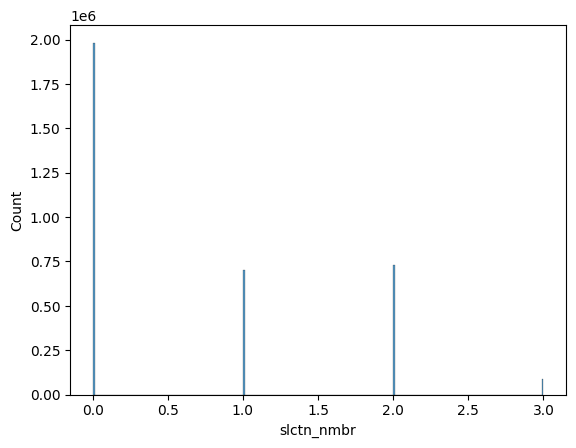

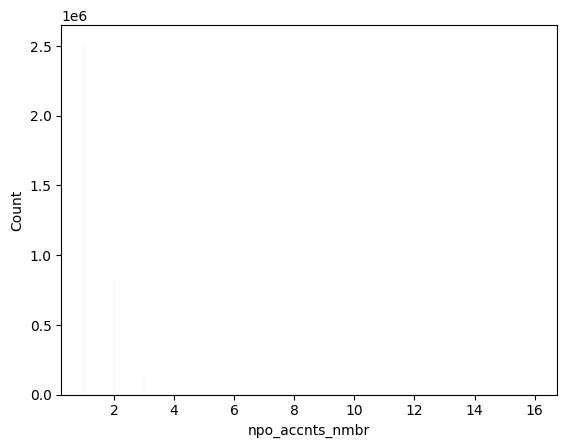

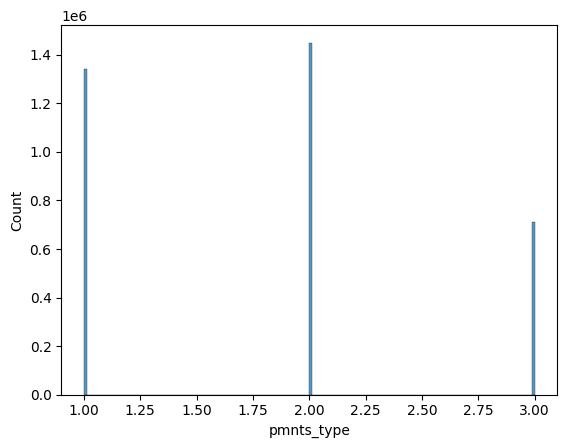

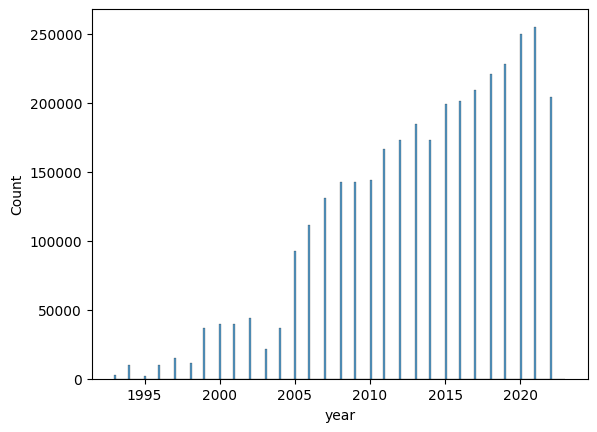

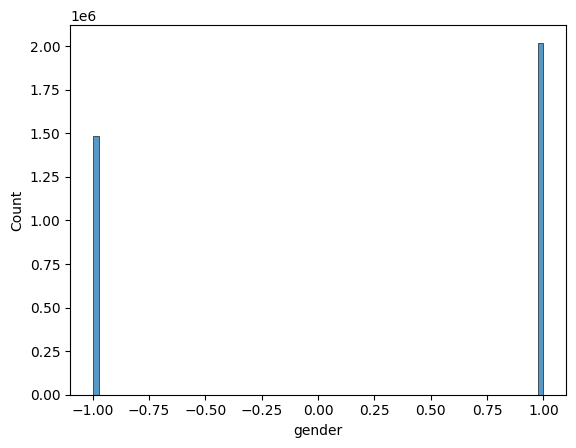

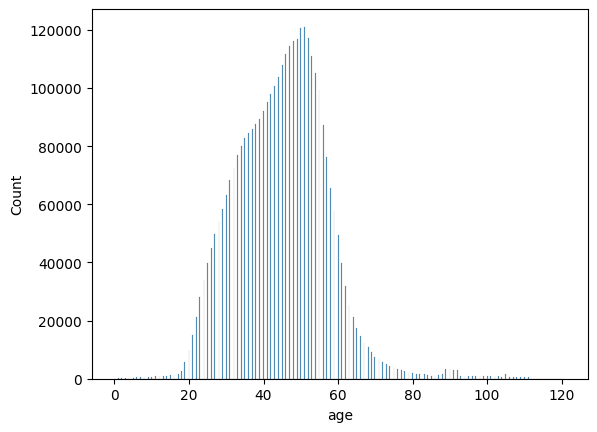

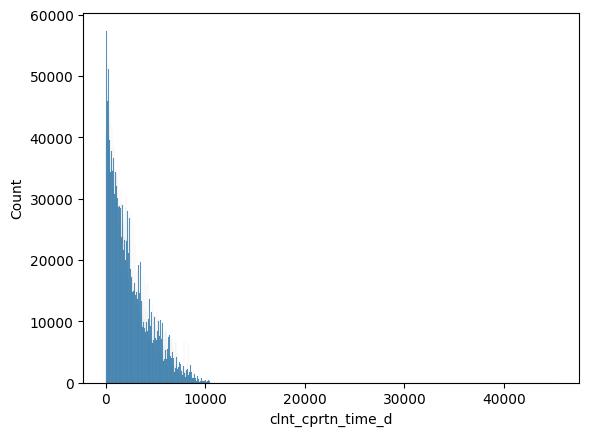

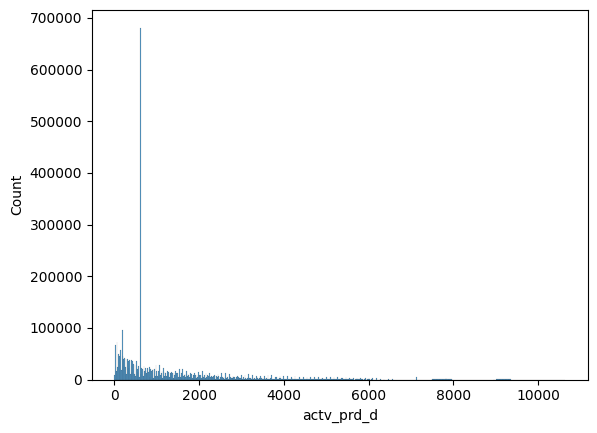

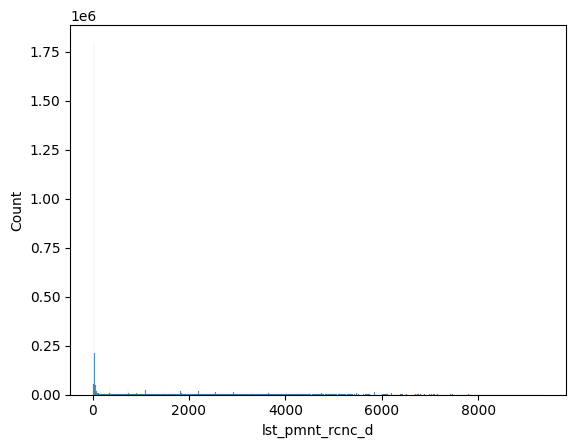

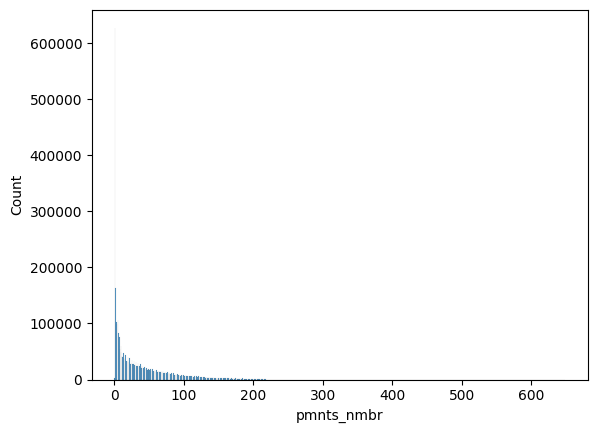

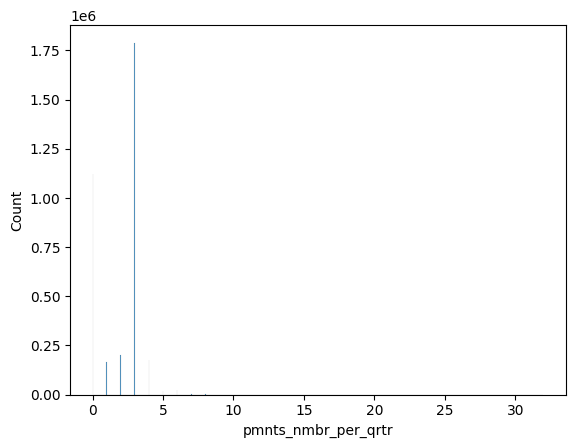

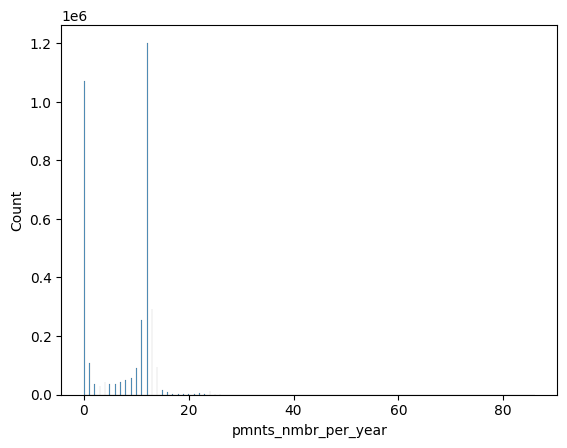

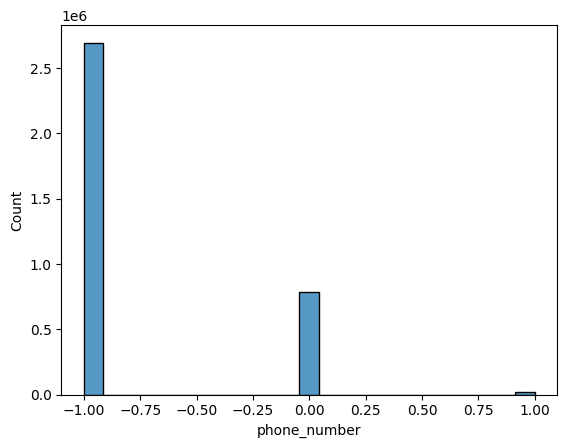

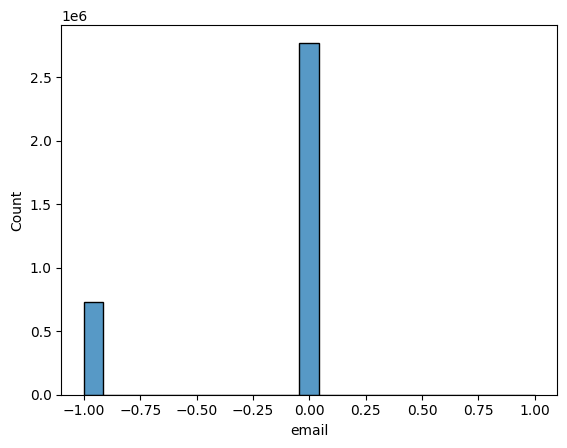

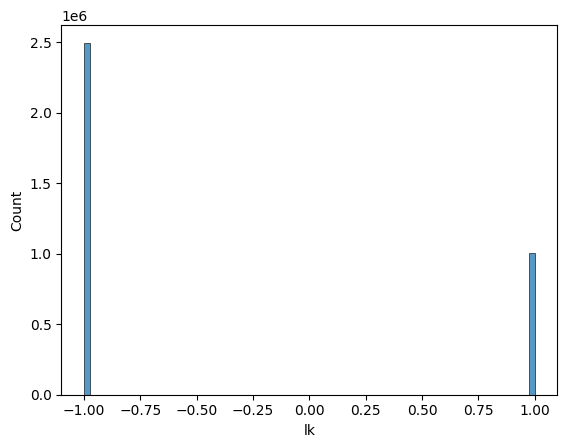

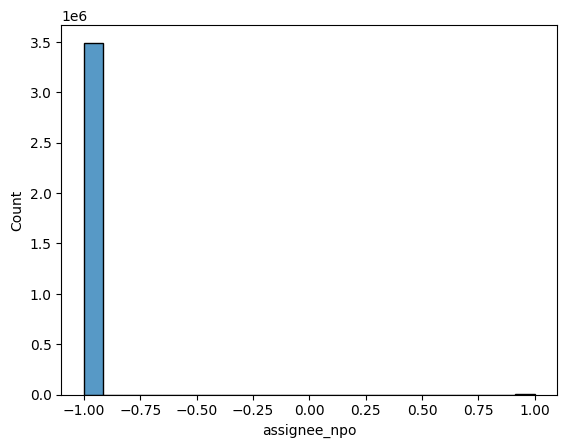

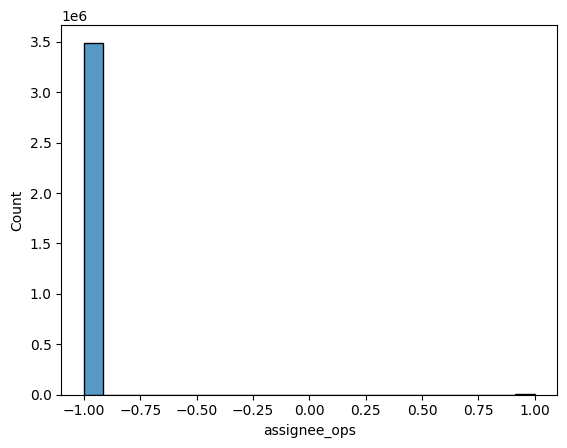

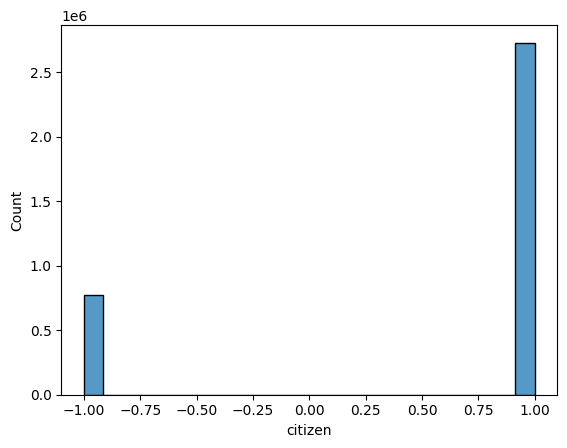

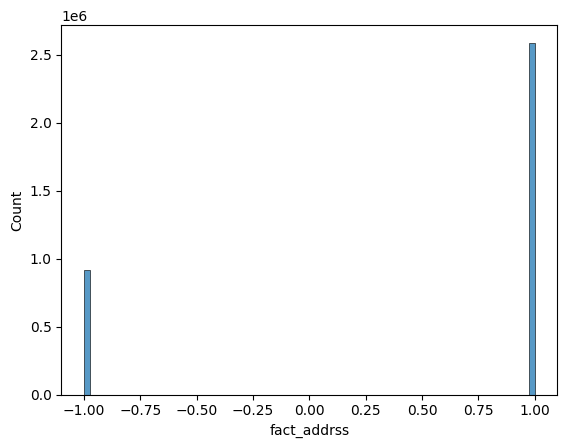

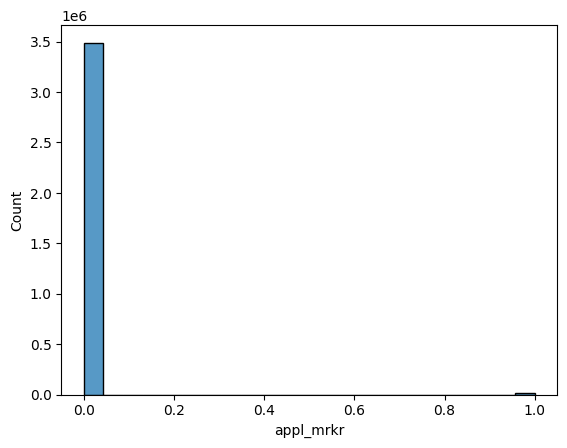

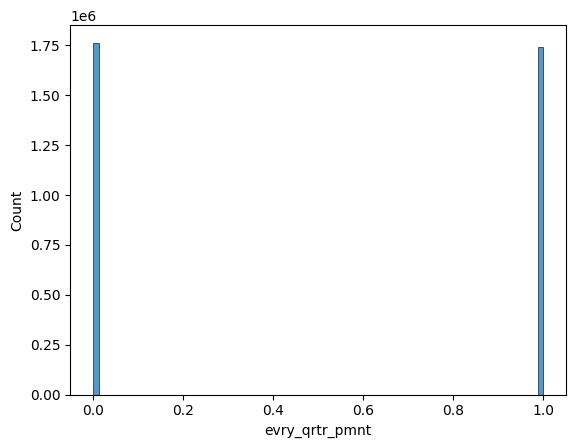

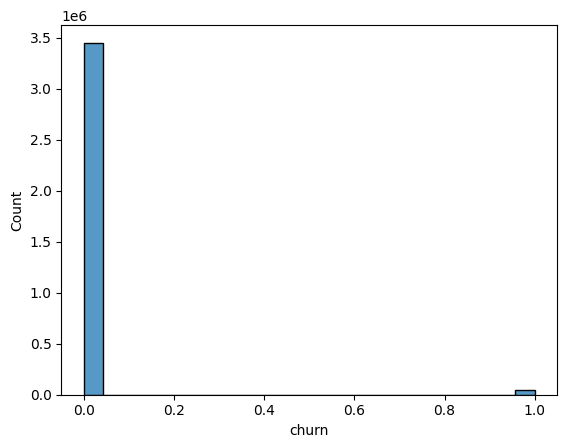

In [32]:
for col in int_cols:
    sns.histplot(train_df[col])
    plt.show()